In [ ]:
from google.colab import files
uploaded : files.upload()

Saving crime_data (3).csv to crime_data (3).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crime = pd.read_csv('crime_data (3).csv')

In [ ]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return (x)


In [ ]:
df_norm=norm_func(crime.iloc[:,1:])

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pandas.core.common import random_state
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=2)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)


Text(0, 0.5, 'WCSS')

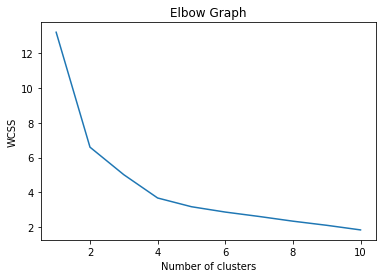

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
model1=KMeans(n_clusters=6)
model1.fit(df_norm)

KMeans(n_clusters=6)

In [ ]:
model1.cluster_centers_
model1.labels_

array([2, 2, 5, 4, 3, 3, 1, 4, 5, 2, 1, 0, 5, 4, 0, 4, 4, 2, 0, 5, 1, 5,
       0, 2, 4, 4, 4, 3, 0, 1, 5, 5, 2, 0, 1, 4, 4, 1, 1, 2, 0, 2, 5, 1,
       0, 4, 1, 0, 0, 4], dtype=int32)

In [ ]:
model=pd.Series(model1.labels_)
model

0     2
1     2
2     5
3     4
4     3
5     3
6     1
7     4
8     5
9     2
10    1
11    0
12    5
13    4
14    0
15    4
16    4
17    2
18    0
19    5
20    1
21    5
22    0
23    2
24    4
25    4
26    4
27    3
28    0
29    1
30    5
31    5
32    2
33    0
34    1
35    4
36    4
37    1
38    1
39    2
40    0
41    2
42    5
43    1
44    0
45    4
46    1
47    0
48    0
49    4
dtype: int32

In [ ]:
crime['clust']=model

In [ ]:
crimeF=crime.iloc[:,[5,0,1,2,3,4]]

In [ ]:
new=crime.iloc[:,2:].groupby(crime.clust).mean